In [135]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from numpy.linalg import eigh
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix as cm

### Principal Component Analysis

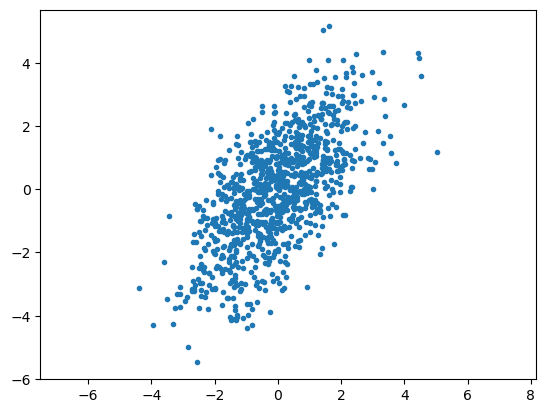

In [136]:
# create some 2D data so we can try reducing dimensions without losing much information

d = stats.multivariate_normal(mean=[0,0],cov=[[2,1.5],[1.5,3]]).rvs(1000)
plt.plot(d[:,0],d[:,1],'.')
plt.axis('equal')
plt.show()

In [137]:
# apply homemade principal component analysis

# [1] subtract off mean of each column of data
d[:,0] = d[:,0] - d[:,0].mean()
d[:,1] = d[:,1] - d[:,1].mean()

# [2] compute the covariance matrix
cov = np.cov(d.T)

# [3] compute the eigenvalues & eigenvectors of the covariance matrix
eigval,eigvec = eigh(cov)

In [134]:
# higher eigenvalues correspond to eigenvectors that explain more of the overall variance
print(eigval)

[1.82971434 3.03769508]


In [138]:
# the columns represent the eigenvectors - they should match up with the directions on the plot above
print(eigvec)

[[-0.81645718  0.57740599]
 [ 0.57740599  0.81645718]]


(-3.7491058286845966, 3.141281512135896, -6.49660449266988, 6.7281523913069075)

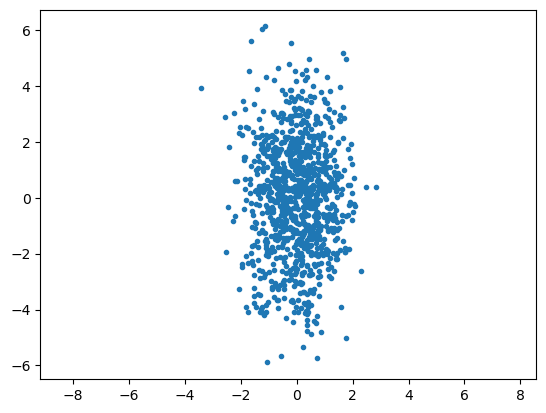

In [139]:
# project the data onto the eigenvectors
d_pca = d @ eigvec

plt.plot(d_pca[:,0],d_pca[:,1],'.')
plt.axis('equal')

# note that the data now has very little covariance
# data from axis-0 can be deleted without losing
# much of the overall variance

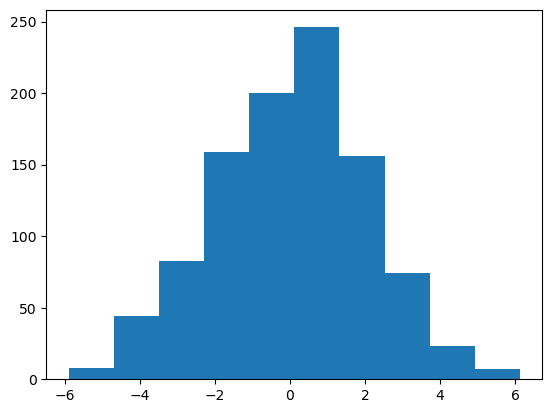

In [140]:
# here is a histogram of the data if we only look at the one
# meaningful feature. This feature is a linear combination of
# the two original data dimensions
plt.hist(d_pca[:,1])
plt.show()

### Expectation Maximization

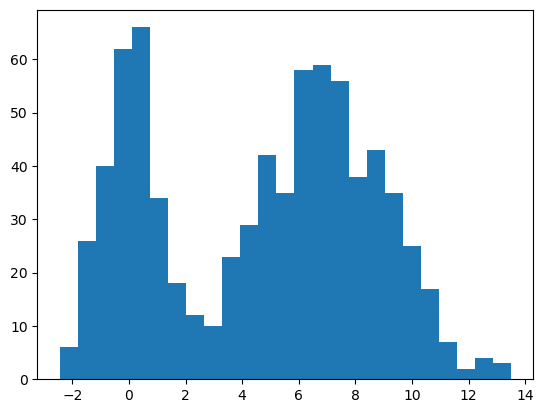

In [141]:
# create data that is a mixture of two gaussians

d1 = stats.norm(loc=0,scale=1).rvs(250)
d2 = stats.norm(loc=7,scale=2.25).rvs(500)
data = np.hstack((d1,d2))
plt.hist(data,bins=25)
plt.show()

In [150]:
# we have to estimate all these variables
# start by giving them random initializations

mu_0 , mu_1 = 0 , 1
st_0 , st_1 = 1 , 1
wt_0 , wt_1 = 0.5 , 0.5

In [165]:
# expectation step
# compute the relative likelihood that each point is in each cluster

pdf_0 = wt_0 * stats.norm(mu_0,st_0).pdf(data)
pdf_1 = wt_1 * stats.norm(mu_1,st_1).pdf(data)

exp_0 = pdf_0 / (pdf_0 + pdf_1)
exp_1 = pdf_1 / (pdf_0 + pdf_1)


In [166]:
# maximization step
# compute new cluster parameters as averages of the data
# weighted according to their expectation weights from above

mu_0 = np.average(data , weights=exp_0)
mu_1 = np.average(data , weights=exp_1)

st_0 = np.sqrt( np.average( (data-mu_0)**2 , weights=exp_0 ) )
st_1 = np.sqrt( np.average( (data-mu_1)**2 , weights=exp_1 ) )

wt_0 = np.average(exp_0)
wt_1 = np.average(exp_1)

In [143]:
# repeat expectation & maximization "many" times

In [172]:
# print results
print(f"{mu_0:5.2f} , {mu_1:5.2f}")
print(f"{st_0:5.2f} , {st_1:5.2f}")
print(f"{wt_0:5.2f} , {wt_1:5.2f}")


-0.03 ,  6.88
 0.93 ,  2.33
 0.33 ,  0.67


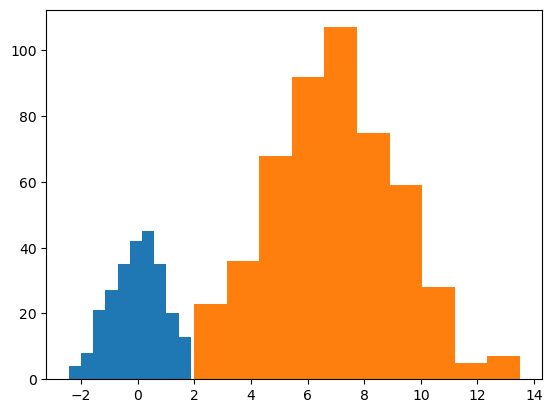

In [173]:
# force clustering based on which cluster is more likley to contain each point
plt.hist(data[exp_0>exp_1])
plt.hist(data[exp_0<exp_1])
plt.show()

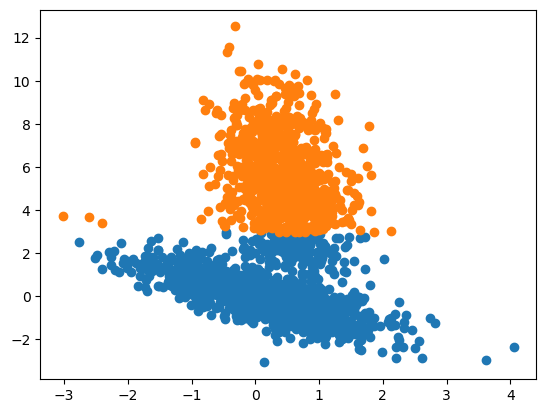

In [174]:
# try making a GMM to model the data from our homework

# recall that with KMeans, it was not able to make two nice
# clusters owing to the restriction of having to draw a
# straight line between clusters

data = np.load('hw5_data_1.npy')
cluster_id_km = KMeans(n_clusters=2).fit_predict(data)
plt.scatter(data[cluster_id_km==0,0],data[cluster_id_km==0,1])
plt.scatter(data[cluster_id_km==1,0],data[cluster_id_km==1,1])
plt.show()

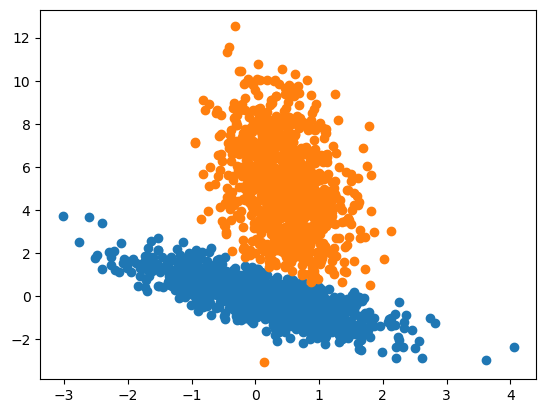

In [178]:
# build and fit a GMM to the data

gmm = GaussianMixture(n_components=2)
gmm.fit(data)
cluster_id_gmm = gmm.predict(data)

plt.scatter(data[cluster_id_gmm==0,0],data[cluster_id_gmm==0,1])
plt.scatter(data[cluster_id_gmm==1,0],data[cluster_id_gmm==1,1])
plt.show()

In [179]:
# get a look at the confusion matrix

true_id = np.zeros(2000,)
true_id[0:1000] = 0
true_id[1000:2000] = 1

print(cm(true_id , cluster_id_gmm))

[[991   9]
 [ 30 970]]


### Central Limit Theorem

(2000.0, 4000.0)

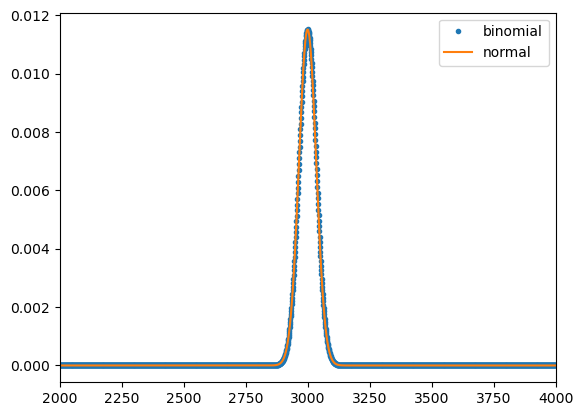

In [131]:
# flip a coin enough times and it becomes indistinguishable from a normal
# distribution

h = np.arange(5000)
p = stats.binom(n=5000,p=0.6).pmf(h)
plt.plot(h,p,'.',label='binomial')

h = np.linspace(0,5000,num=5000)
p = stats.norm(loc=3000 , scale=np.sqrt(1200)).pdf(h)
plt.plot(h,p , label='normal')
plt.legend()
plt.xlim(2000,4000)